<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="float:right; max-width: 250px; display: inline"  alt="Wikistat"/></a>
</center>

# [Scénarios d'Exploration Statistique](https://github.com/wikistat/Exploration)

# Exploration, classification  en <a href="https://cran.r-project.org/"><img src="https://cran.r-project.org/Rlogo.svg" style="max-width: 40px; display: inline" alt="R"/></a> des encours boursiers parisiens


### Résumé
Scénario d'analyse d'un jeu de données : l'ensemble des séries des encours boursier à Paris. Description, lissage et classification de ces courbes. Utilisation des différentes techniques descriptives uni, bi et [multidimensionnelles](http://wikistat.fr/pdf/st-m-explo-intro.pdf): [ACP](http://wikistat.fr/pdf/st-m-explo-acp.pdf), [k-means,CAH](http://wikistat.fr/pdf/st-m-explo-classif.pdf).

## objectif
Le travail proposé s'intéresse aux cours des actifs boursiers sur la place de Paris de 2000 à 2009. Seuls 252 cours d'entreprises ou indices sont considérés, ceux qui ont été régulièrement cotés sur la période concernée. Les autres, présentant trop de données manquantes car introduits ou exclus au cours de la période, par exemple à la suite d'une fusion, ont été éliminées. Le travail ne se veut pas exhaustif mais illustratif. 

L'objectif principal est la réalisation d'une classification des entreprises au regard du comportement de leur titre au cours de la période et plus particulièrement autour des difficultés rencontrées en 2002 et 2008. Il s'agit donc de déterminer des groupes ou classes homogènes quant à ce comportement. Ce travail est relativement original car absent des analyses financières classiques qui se focalisent sur le comportement d'un titre avec des indicateurs très sophistiqués associés à une série chronologique. L'originalité vient de ce que ce sont toutes les séries qui sont simultanément étudiées. Ce pourrait être le travail préalable d'un analyste qui, voulant constituer un portefeuille *équilibré*, chercherait des classes de comportement homogènes afin de compléter une information plus spécifique sur chaque entreprise et leur secteur d'activité. Il ne s'agit donc d'une étude exploratoire sans se préoccuper des qualités prédictives de modèles. 

Après un descriptif de l'origine des données, la première partie décrit un traitement préalable des données, la deuxième une description multidimensionnelle par analyse en composantes principales, la troisième, la recherche d'une classification non supervisée, de sa représentation et de son interprétation. La spécificité de l'analyse est qu'il s'agit ici de données temporelles. La même variable est observée à différents instants.


## Données
### Présentation
Beaucoup de sites, dont les principaux moteurs de recherche, proposent des historiques des grandes places boursières. Ces historiques fournissent, pour une action, (définie par son code), pour une période donnée et pour chaque jour : le cours d'ouverture, le maximum, le minimum, le cours de fermeture et le nombre de titres échangés. 

La première tâche est un travail de compilation afin de récupérer l'ensemble des titres gérés, ici par la bourse de Paris. La deuxième est un filtrage afin de ne conserver que les titres cotés sur toute une période (2000 à 2009). La troisième nécessite un choix de « granularité ». En effet, nous nous intéressons au comportement global sur la période en négligeant les fluctuations du titre à court terme ainsi que la volatilité (la variance) associée. Le choix fait est celui de la simplicité: on s'intéresse aux moyennes mensuelles des cours. Cet indicateur étant relativement grossier, il n'est plus important de savoir s'il s'agit de la moyenne du cours à l'ouverture, la  fermeture, le min ou le max, c'est le montant à l'ouverture qui a été choisi. En complément du calcul de cette moyenne mensuelle, l'opportunité d'un lissage est prise en compte afin de débruiter les données pour mieux se focaliser sur l'analyse des grandes tendances des comportements. 

**Répondre aux questions en s'aidant des résultats des exécutions**.

### Lecture
Les données (fichier `paris2010.text`) sont disponibles dans le répertoire de ce calepin et sont chargées simultanément. 

**Q** Quelles sont les dimensions de cette analyse (nombre de variables, nombre d’individus) ?

In [1]:
paris=read.table("paris_10.txt",row.names="Nom",header=TRUE,sep=",")
isin=paris[,121] # codes des cours
paris=paris[,-121]
summary(paris)

       t1                  t2                  t3           
 Min.   :    0.395   Min.   :    0.415   Min.   :    0.672  
 1st Qu.:   15.370   1st Qu.:   17.609   1st Qu.:   19.500  
 Median :   34.824   Median :   36.486   Median :   37.519  
 Mean   :  339.825   Mean   :  353.511   Mean   :  368.283  
 3rd Qu.:   58.510   3rd Qu.:   62.995   3rd Qu.:   68.643  
 Max.   :18918.842   Max.   :19696.229   Max.   :19827.561  
       t4                  t5                  t6           
 Min.   :    0.647   Min.   :    0.617   Min.   :    0.555  
 1st Qu.:   17.580   1st Qu.:   18.371   1st Qu.:   19.134  
 Median :   37.063   Median :   37.415   Median :   36.378  
 Mean   :  351.182   Mean   :  337.249   Mean   :  342.388  
 3rd Qu.:   62.837   3rd Qu.:   62.000   3rd Qu.:   63.045  
 Max.   :19631.839   Max.   :17119.555   Max.   :16928.055  
       t7                  t8                  t9           
 Min.   :    0.445   Min.   :    0.486   Min.   :    0.475  
 1st Qu.:   18.577   1st

## Traitements préalables
**Q** Quels prétraitements semblent indispensables. Les justifier en commentant les graphiques.

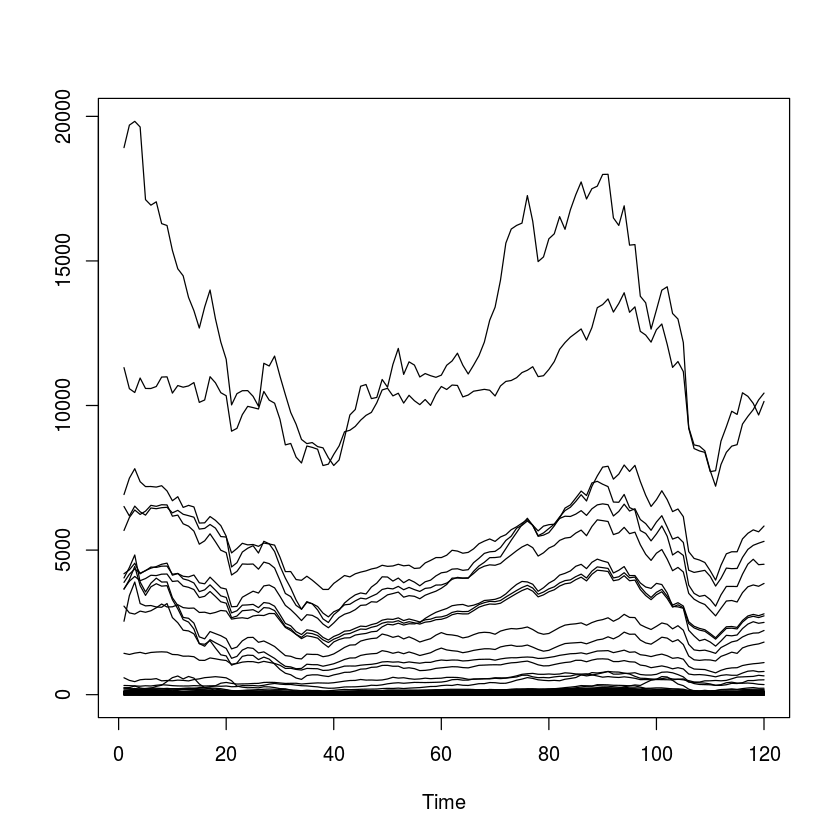

In [2]:
ts.plot(t(paris))

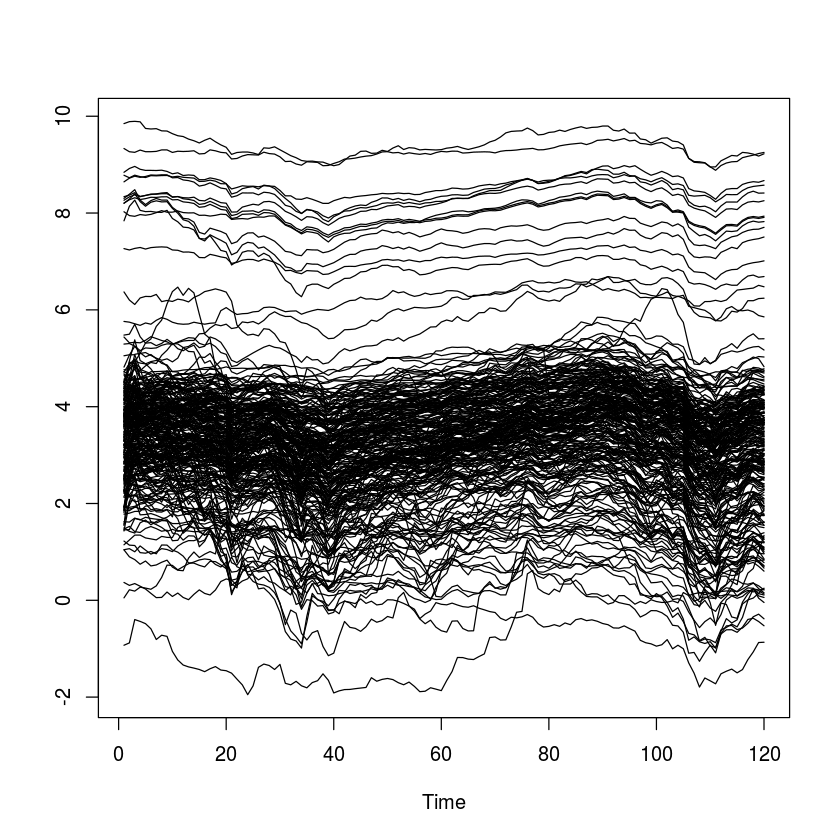

In [3]:
lparis=log(paris)
ts.plot(t(lparis))

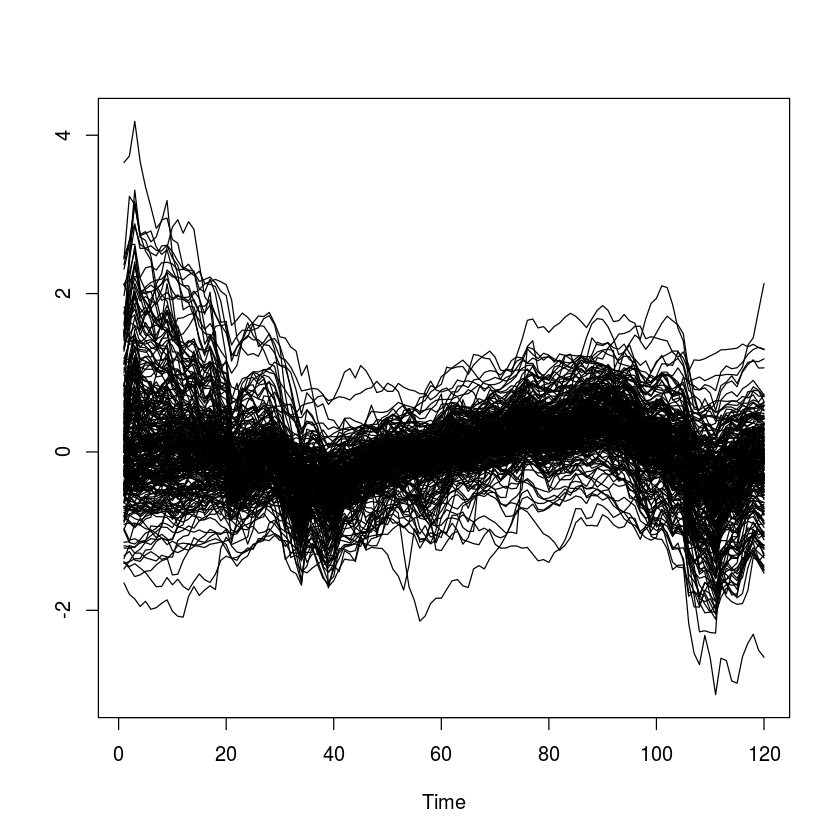

In [4]:
lparis0=lparis-apply(lparis,1,mean)
ts.plot(t(lparis0))

**Q** Bref commentaire sur les trajectoires finalement obtenues

Malgré le lissage opéré en calculant des moyennes mensuelles, les courbes sont très "bruitées". Une autre transformation est envisagée par la fonction `smooth.spline` pour différentes valeurs d’un paramètre `spar`. 

**Q** Quelle est cette transformation ? Quel est le rôle du paramètre spar ?

In [5]:
lsm=function(y,spar) {
n <- nrow(y)
p <- ncol(y)
ychap <- y
for(i in 1:n) {
ychap[i, ] <- smooth.spline(1:p,y[i, ],spar=spar)$y
}
ychap
}

Exécuter le lissage pour différentes valeurs du paramètres et représenter une des séries des cours pour illusrer l'effet du paramètre de lissage.

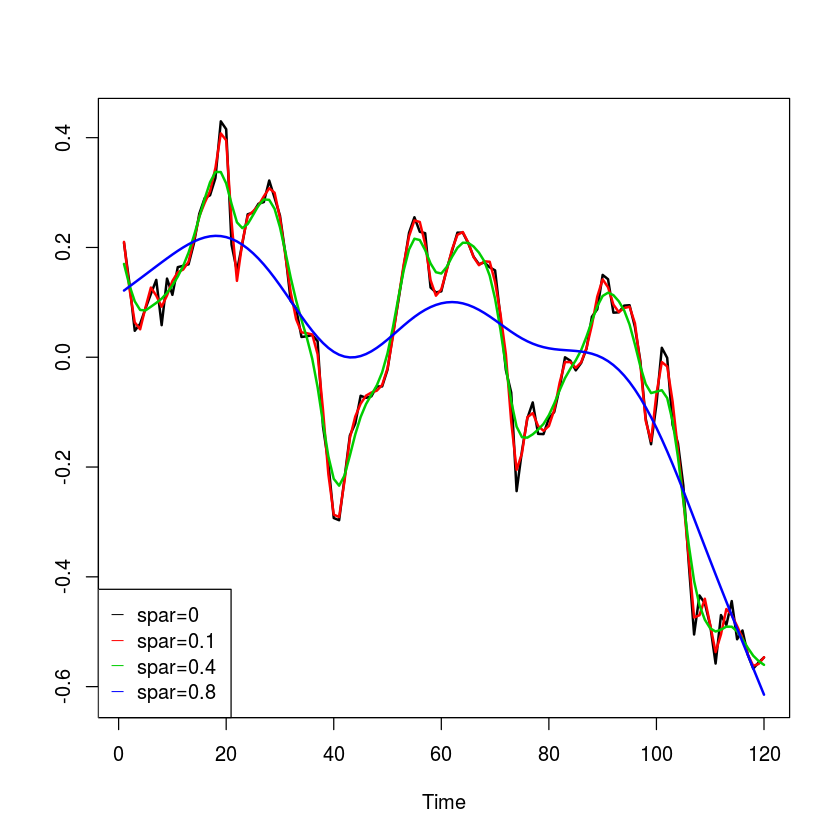

In [6]:
# lissages
sm01.lparis0=lsm(lparis0,0.1)
sm04.lparis0=lsm(lparis0,0.4)
sm08.lparis0=lsm(lparis0,0.8)
sm1.lparis0=lsm(lparis0,1)
# graphe
ts.plot(t(rbind(lparis0[100,],sm01.lparis0[100,],sm04.lparis0[100,],sm08.lparis0[100,])),col=1:4,lwd=2)
legend("bottomleft",legend=c("spar=0","spar=0.1","spar=0.4", "spar=0.8"),col=c(1:4),pch="_")

## Analyse en composantes principales
Le calcul d’une analyse en composantes principales nécessite, ou non, une autre transformation préalable des données. Que représente le graphique ci-dessous? Jugez-vous nécessaire cette autre transformation?

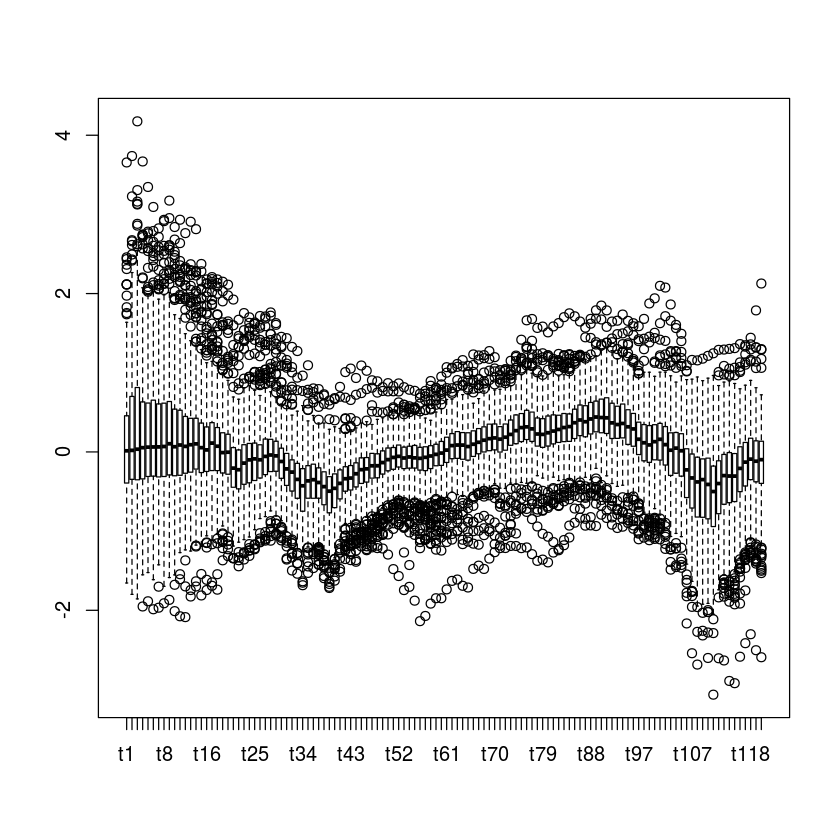

In [7]:
boxplot(lparis0)

### ACP réduite ou non ?
Comparer les résultats ci-dessous.

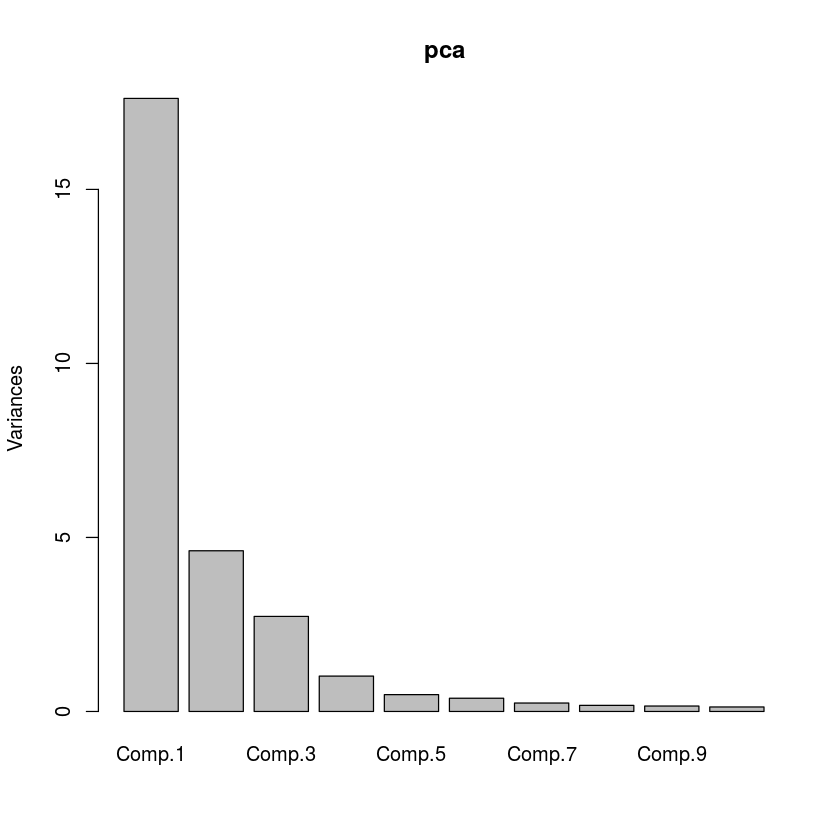

In [8]:
# Acp non réduite
pca=princomp(lparis0)
plot(pca)

In [ ]:
biplot(pca)

In [ ]:
# ACP réduite
pcar=princomp(lparis0,cor=TRUE)

**Q** La fonction `princomp` de R fournit les résultats ci-dessous. Que valent les 3 premières valeurs propres de l’ACP des séries boursières?

In [ ]:
print(pcar)

In [ ]:
plot(pcar)

In [ ]:
biplot(pcar)

**Q** A l'aide des deux *biplots* des ACP réduites et non réduites, expliquer la grande similitude entre les deux représentations des individus et la différence entre celles des variables ?

### Quel lissage?
Le choix du paramètre de lissage est basée sur les résultats de l'analyse en composantes principales.

**Q** Que représentent les graphiques ci-dessous. Quelles décisions suggèrent-ils pour le choix du nombre de composantes et celui de la valeur de spar  (justifier) ?

In [ ]:
par(mfcol=c(2,2))
plot(princomp(lparis0,cor=TRUE))
plot(princomp(sm04.lparis0,cor=TRUE))
plot(princomp(sm08.lparis0,cor=TRUE))
plot(princomp(sm1.lparis0,cor=TRUE))

**Q** Les vecteurs "loadings" fournis par la fonction princomp de R sont les vecteurs propres de l’ACP. Combien sont-ils? De quelle matrice sont-ils les vecteurs propres? En utilisant une valeur de spar "optimale". Que sont les courbes ci-dressous.

In [ ]:
pcars=princomp(sm08.lparis0,cor=TRUE)
plot.ts(pcars$loadings[,1:6],main="Fonctions propres")

Tracé de 4 cours remarquables avec un lissage "optimal".

In [ ]:
ts.plot(t(sm08.lparis0[c("Somfy","Fala","Billon","Trigano"),]),gpars=list(col=c(1:4)),lwd=2)
legend("bottomleft",legend=c("Somfy","Fala","Billon","Trigano"),col=c(1:4),pch="_")

**Q** S'aider de ces deux derniers graphes pour interpréter, ci-dessous, les 3 premiers axes factoriels de l'ACP lissée. Mettre en relation ces interprétations avec les séries des 4 cours remarquables.

In [ ]:
biplot(princomp(sm08.lparis0))

**Q**	A partir des représentations précédentes, commenter les cours des actions (sans interprétation économique) de Somfy, Fala, Billon, Trigano.
### MDS ou ACP de distances
**Q** Comparer la représentation de l'ACP avec celle du positionnement multidimensionnel (MDS) ou ACP du tableau des distances. Pourquoi sont-elles si comparables?

In [ ]:
# centrage et réduction des variables temporelles
actions=scale(sm08.lparis0)
dN=dimnames(lparis0)[[1]]
# distances euclidiennes
d=dist(actions)
# MDS
mdparis= cmdscale(d, k=3)
plot(mdparis, type="n", xlab="", ylab="",main="")
text(mdparis,dN)
abline(v=0,h=0)

## Classification des cours
### Classification ascendante hiérarchique
Attention, il est important en classification de calculer à partir des variables réduites car cette transformation n'est pas implicite.

**Q** On s’intéresse à la classification des entreprises en considérant les distances euclidiennes usuelles entre leurs cours. Quelle méthode ? Quel est le graphique ci-dessous ? Que signifie l'option `ward.D`?

In [ ]:
# CAH
hc.d = hclust(d,method="ward.D")
# dendrogramme
plot(hc.d,main="")  

**Q** Que représente le graphe ci-dessous ? Comment l’interpréter ?

In [ ]:
plot(hc.d$height[252 :240],type="b")

Fixer le nombre de classes et couper l'arbre.

In [ ]:
classif.6a = cutree(hc.d,k=6)
# actions de la 2ème classe
names(classif.6a[classif.6a==2])

Représenter avec des couleurs dans les coordonnées du MDS.

In [ ]:
coul = classif.6a
mds=cmdscale(d,k=3)
# avec les noms des actions
plot(mds, type="n",xlab="Dim1",ylab="Dim2")
text(mds,dN,col=coul)

In [ ]:
# avec des points
plot(mds, type="p",col=coul,pch=19,cex=1,xlab="Dim1", ylab="Dim2", main="")

### Algorithme de réallocation
**Q** Que réalise la commande ci-dessous?

In [ ]:
km.actions=kmeans(actions,centers=6)

**Q** La table ci-dessous croise (table de contingence) les classes obtenues par la commande précédente avec celle précédente. Que dire de la comparaison entre ces deux typologies?

In [ ]:
table(classif.6a,km.actions$cluster,dnn=c("cah","kmeans"))

**Q** Au lieu d’être initialisé de façon aléatoire, l’algorithme `kmeans` est initialisé à partir des barycentres des classes de la classification précédente. La comparaison de cette nouvelle classification donne le résultat ci-dessous. Commentaire. Que dire de la convergence de l’algorithme `kmeans`?

In [ ]:
# matrice nulle
mat.init.km.actions=matrix(nrow=6,ncol=120)
# calcul des barycentres des classes 
for (i in 1 :6) 
   mat.init.km.actions[i,]=apply(actions[classif.6a==i,],2,mean)
# kmeans après initialisation 
# par les barycentres
km.actions.init=kmeans(actions,centers=mat.init.km.actions)
# comparaisons des classifications
table(classif.6a,km.actions.init$cluster,dnn=c("cah","kmeans2"))

**Q** Comparer le graphe ci-dessous avec celui précédent. Pourquoi cette dernière classification est retenue.

In [ ]:
coul1 = km.actions.init$cluster
plot(mds, type="n", xlab="Dim1",ylab="Dim2", main="")
text(mds,dN,col=coul1)

Il est possible d'obtenir les représentations dans les autres plans : 

In [ ]:
plot(mds[,c(1,3)], type="p",col=coul1,cex=1, xlab="Dim1", ylab="Dim3", main="")

Mais celle-ci n'apporte pas grand chose pour la représentation des classes qui se discriminent bien dans le premier plan.

Un graphique permet de représenter la bonne homogénéité des classes de courbes.

In [ ]:
klasse=km.actions.init$cluster
par(mfcol=c(2,3))
ts.plot(t(sm08.lparis0[klasse==1,]),ylim=c(-3,3),col=1)
ts.plot(t(sm08.lparis0[klasse==2,]),ylim=c(-3,3),col=2)
ts.plot(t(sm08.lparis0[klasse==3,]),ylim=c(-3,3),col=3)
ts.plot(t(sm08.lparis0[klasse==4,]),ylim=c(-3,3),col=4)
ts.plot(t(sm08.lparis0[klasse==5,]),ylim=c(-3,3),col=5)
ts.plot(t(sm08.lparis0[klasse==6,]),ylim=c(-3,3),col=6)

Ainsi que les moyennes des classes.

In [ ]:
ts.plot(cbind(apply(sm08.lparis0[klasse==1,],2,mean),
   apply(sm08.lparis0[klasse==2,],2,mean),
   apply(sm08.lparis0[klasse==3,],2,mean),
   apply(sm08.lparis0[klasse==4,],2,mean),
   apply(sm08.lparis0[klasse==5,],2,mean),
   apply(sm08.lparis0[klasse==6,],2,mean)),
   ylim=c(-2,2),col=1:6,lwd=2)

**Q** Interpréter les classes obtenues.